## Spring 2021 Data Bootcamp Midterm Project


### Daniel Abboudi

### Carlisle Catacutan

### Garima Chaudhary

## To start our project we imported packages and read-in the csv file. To better understand the data we read it in as a dataframe. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
path = 'DB_MidtermSampleData_Mar21.csv'

In [2]:
df = pd.read_csv(path)

## We then cleaned up the data by replacing the empty fields.

In [3]:
# Treat 'empty' fields as NaN
df = df.replace('empty',np.NaN)

## We were interested in the companies listed in the dataframe so we listed them out.

In [4]:
df['company'].value_counts().index

Index(['Johnson & Johnson', 'Procter & Gamble Co', 'Omnicom Group Inc',
       'International Business Machines Corporation', 'Walmart Inc',
       'Verizon Communications Inc.', 'Coca-Cola Company', 'JPMorgan Chase',
       'MICROSOFT CORPORATION', 'Amazon.com, Inc.', 'General Electric Company',
       'PepsiCo, Inc.', 'Intel Corporation', 'Alphabet Inc.',
       'Hewlett Packard Enterprise Company', 'Siemens AG',
       'Honeywell International Inc', 'Orange SA', 'Tata Group', 'Apple, Inc.',
       'Walt Disney Company', 'Facebook Inc', 'AT&T', 'Dell Technologies Inc',
       'Vodafone Group PLC', 'GENERAL MOTORS COMPANY', 'Ford Motor Company',
       'Oracle Corporation', 'Unilever NV', 'CVS Health Corporation',
       'Barclays PLC', 'Accenture PLC', 'Nestle SA', 'Volkswagen AG',
       'Novartis AG', 'Morgan Stanley', 'ABB Ltd', 'Pfizer Inc',
       'Staples Inc.', 'WPP PLC', 'Bank of America Corporation',
       'United Technologies Corporation', 'Citigroup Inc', 'Roche Holding A

## Then we checked each column of data to see what type of data we were working with.

In [5]:
df.dtypes

company          object
sector           object
month            object
job_category     object
region           object
gender           object
count           float64
inflow          float64
outflow         float64
dtype: object

## We first looked at the geographical breakdown for each gender.

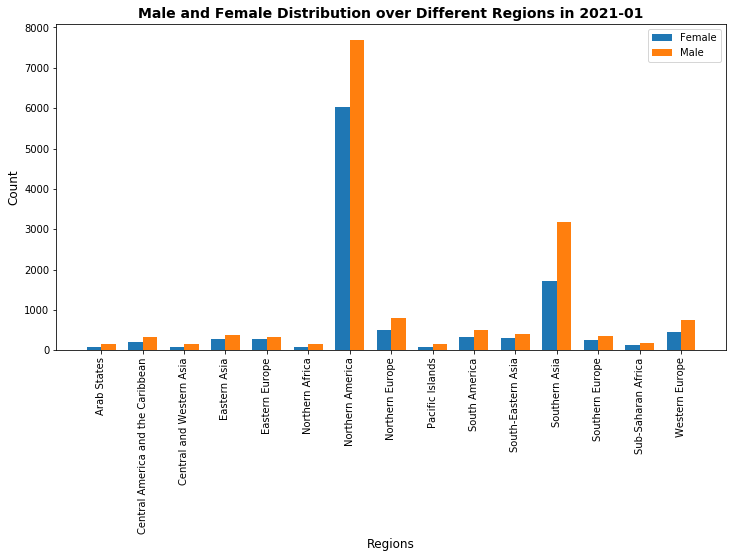

In [6]:
# Q. What is the distribution of males and females in different regions for the
#   most recent month?

# Getting most recent month
recent_month = df['month'].max()
recent_month

# Filtering out females
df_female = df.loc[(df['gender'] == 'female') & 
                   (df['month'] == recent_month), :]

# Filtering out males
df_male = df.loc[(df['gender'] == 'male') &
                 (df['month'] == recent_month), :]

# Distribution of females in different regions
region_female = df_female.groupby('region', as_index=False).agg({'count': 'mean'}).sort_values('region')

# Distribution of males in different regions
region_male = df_male.groupby('region', as_index=False).agg({'count': 'mean'}).sort_values('region')

# Graph: 

n = np.arange(len(region_female['region'])) # the label locations
width = 0.35  # the width of the bars
upper_limit = max(region_female['count'].max(), region_male['count'].max())+1000 # max limit of y axis
label = list(region_female['region'])

female = list(region_female['count'])
male = list(region_male['count'])


fig, ax = plt.subplots(figsize=(12,6))

rects1 = ax.bar(n - width/2, female, width, label='Female')
rects2 = ax.bar(n + width/2, male, width, label='Male')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count', size= 12)
ax.set_xlabel('Regions', size= 12)
ax.set_title('Male and Female Distribution over Different Regions in '+ recent_month, size=14, fontweight="bold")
ax.set_xticks(n)
ax.set_xticklabels(label)
plt.xticks(rotation=90)

ax.legend()

## Interesting! It seems that most of our data is concentrated in North America. It is also noteworthy that there are more male employees than female employees in every region.¶

## With this in mind, we wanted to pick a company that would could look in to, but our approach to developing a set of code was to build in a way that enabled us to change the company name and sector.

In [7]:
# Define Company
company = 'MICROSOFT CORPORATION'

# Define Sector
sector = 'Information Technology'

## So we started by filtering the dataframe for the company and sector we were interested in exploring.

In [8]:
# Pull company
com = df.loc[df['company']==company,:]

## Then we looked into some simple questions about the company makeup.

In [9]:
# How many employees does the company have?
com.loc[com['month']==com['month'].max(),'count'].sum()

439855.08444770006

In [10]:
# How many males?
com.loc[(com['month']==com['month'].max()) & (com['gender']=='male'),'count'].sum()

281009.58535538713

In [11]:
# How many females?
com.loc[(com['month']==com['month'].max()) & (com['gender']=='female'),'count'].sum()

158845.49909231294

## Then we created another dataframe to look deeping into the types of roles that each gender had within the company.

In [12]:
# What positions do com employees fulfill? Need to sum by 'job_category'
com2 = com.loc[com['month']==com['month'].max(),:]
com2 = com2.groupby(['job_category','gender']).agg({'count':'sum'})
com2 = com2.reset_index()

# Split the data into two groups by gender
male = com2.loc[com2['gender']=='male',:].set_index('job_category')
female = com2.loc[com2['gender']=='female',:].set_index('job_category')
female

,gender,count
job_category,,
administrative,female,4919.452199
engineer,female,56931.897171
finance,female,8290.367964
management,female,37982.177935
marketing,female,9642.722500
sales,female,20223.363519
scientist,female,4762.938735
technician,female,5902.232550


In [13]:
male

,gender,count
job_category,,
administrative,male,4475.086883
engineer,male,127441.503137
finance,male,6281.660796
management,male,66348.732761
marketing,male,11675.654514
sales,male,31940.603128
scientist,male,5880.197481
technician,male,10573.823638


## With this data in hand, we wanted to see how the company compared to other companies in the same sector. So we refiltered the original data.

In [14]:
# Pull Sector data and Remove company from this data to compare rest of sector 
# to company

sector_df = df.loc[(df['sector']==sector) & (df['company']!=company) & (df['month']==df['month'].max()),:]
sector_df[:10]

,company,sector,month,job_category,region,gender,count,inflow,outflow
570187,"Apple, Inc.",Information Technology,2021-01,management,Northern Africa,female,2.060316e+02,1.948740e+00,6.192986e-01
570188,Accenture PLC,Information Technology,2021-01,sales,Southern Europe,male,4.210479e+02,7.184832e+00,4.669169e+00
570197,DXC Technology Co,Information Technology,2021-01,administrative,Northern America,female,2.364157e+02,7.113997e+00,4.296831e+00
570200,Wipro Ltd,Information Technology,2021-01,finance,Arab States,female,2.547437e+01,2.854053e-01,9.172009e-02
570203,Infosys Ltd,Information Technology,2021-01,marketing,Sub-Saharan Africa,male,1.517675e+01,1.538913e-01,6.263603e-02
570204,Intel Corporation,Information Technology,2021-01,marketing,Western Europe,male,7.746985e+01,1.721060e+00,1.988730e+00
570206,Atos SE,Information Technology,2021-01,finance,South America,male,6.209916e+01,1.649090e+00,1.407529e+00
570214,Atos SE,Information Technology,2021-01,scientist,Central and Western Asia,male,5.879089e-19,5.879089e-19,4.322669e-19
570216,Wipro Ltd,Information Technology,2021-01,scientist,Western Europe,female,9.313484e-01,5.143460e-03,4.368691e-03
576067,IQVIA,Information Technology,2021-01,administrative,Central America and the Caribbean,male,1.285085e+01,2.733745e-01,2.797548e-01


In [15]:
sector_df2 = sector_df.groupby(['job_category','gender']).agg({'count':'sum'})
sector_df2 = sector_df2.reset_index()

# Split the data into two groups by gender
male_sector = sector_df2.loc[sector_df2['gender']=='male',:].set_index('job_category')
female_sector = sector_df2.loc[sector_df2['gender']=='female',:].set_index('job_category')
female_sector

,gender,count
job_category,,
administrative,female,4.901621e+04
engineer,female,1.010572e+06
finance,female,8.304000e+04
management,female,4.429822e+05
marketing,female,4.132721e+04
sales,female,1.363506e+05
scientist,female,3.152170e+04
technician,female,3.239551e+04


In [16]:
male_sector

,gender,count
job_category,,
administrative,male,4.111243e+04
engineer,male,1.956867e+06
finance,male,9.163431e+04
management,male,7.924661e+05
marketing,male,5.059552e+04
sales,male,2.523236e+05
scientist,male,2.791048e+04
technician,male,8.164888e+04


## We used the data to build charts that reflected the company job breakdown by gender, and then did the same for the sector.

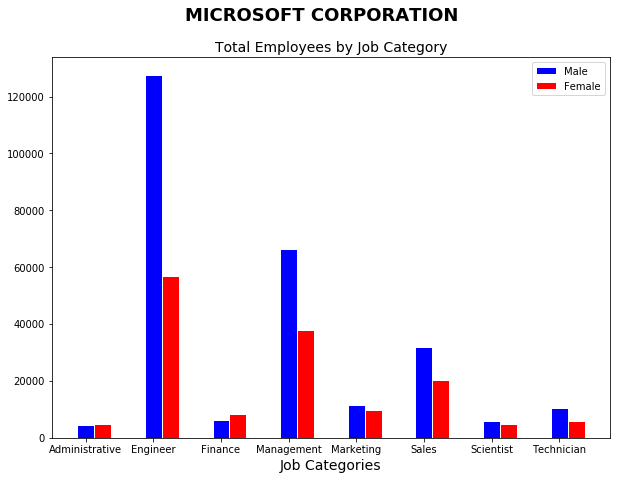

In [17]:
fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(10,7))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = male['count']
bars2 = female['count']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle(company,size=18,fontweight='bold')
plt.title('Total Employees by Job Category',size=14)
plt.xlabel('Job Categories',size=14)
plt.xticks(male.reset_index().index,male.index.str.capitalize(),size=10)

# Create legend & Show graphic
plt.legend()
plt.show()

## We see that for Microsoft, the most popular job is Engineer and that males outnumber females by a large margin. In marketing, there are much fewer employees, but this job seems to be more evenly split between males and females.

## So what does the rest of the sector look like? Let's see!

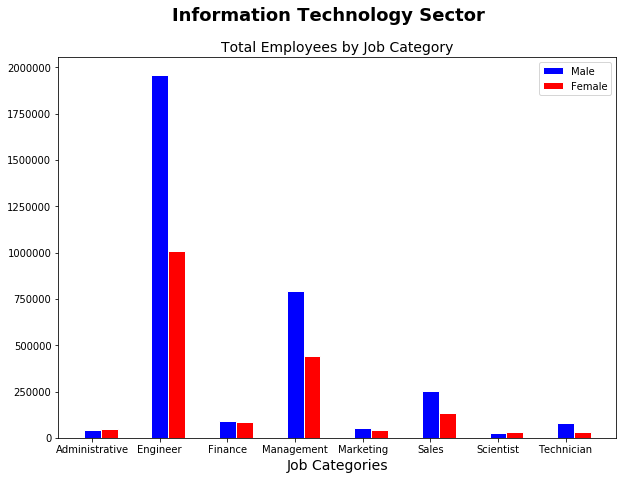

In [18]:
fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(10,7))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = male_sector['count']
bars2 = female_sector['count']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle((sector+' Sector'),size=18,fontweight='bold')
plt.title('Total Employees by Job Category',size=14)
plt.xlabel('Job Categories',size=14)
plt.xticks(male_sector.reset_index().index,male_sector.index.str.capitalize(),size=10)

# Create legend & Show graphic
plt.legend()
plt.show()

## The graphs look fairly similar! Once again, Engineer is the most popular job, and the males outnumber females in this role. Management, marketing and sales for the sector look proportionally similar to Microsoft. This suggests the job breakdown for Microsoft is similar to the industry as a whole.

## The next thing we wanted to explore was the spread in the percentage of male and female employees, for both the company and the sector as a whole. So we took a similar approach as above, creating dataframes for the company and then sector. 

In [19]:
# Company Hiring Over Time
com_month = com.groupby(['month','gender'])[['count']].sum().reset_index()
com_month

# Find spread between % of employees as male vs female
com_month['percentage'] = 0

# Difference between % male and % female (spread = 0 if split is 50/50)
com_month['spread'] = 0
for i in range(len(com_month)):
    com_month.loc[i,'percentage'] = (com_month.loc[i,'count']/com_month
                                     .loc[com_month['month']==com_month
                                          .loc[i,'month'],'count'].sum())
    com_month.loc[i,'spread'] = com_month.loc[i,'percentage']-(1-com_month.loc[i,'percentage'])
com_month[:10]

,month,gender,count,percentage,spread
0,2012-01,female,102376.380712,0.341496,-0.317009
1,2012-01,male,197411.944975,0.658504,0.317009
2,2012-02,female,101114.763900,0.341446,-0.317109
3,2012-02,male,195022.479654,0.658554,0.317109
4,2012-03,female,101656.914626,0.341432,-0.317136
5,2012-03,male,196080.147403,0.658568,0.317136
6,2012-04,female,101906.983898,0.341423,-0.317153
7,2012-04,male,196569.864725,0.658577,0.317153
8,2012-05,female,102754.733276,0.341234,-0.317532
9,2012-05,male,198372.106035,0.658766,0.317532


## Note that we are exploring the spread over time. Good news is we have almost a decade of data!

In [20]:
male = com_month.loc[com_month['gender']=='male',:]
female = com_month.loc[com_month['gender']=='female',:]
female[:10]

,month,gender,count,percentage,spread
0,2012-01,female,102376.380712,0.341496,-0.317009
2,2012-02,female,101114.763900,0.341446,-0.317109
4,2012-03,female,101656.914626,0.341432,-0.317136
6,2012-04,female,101906.983898,0.341423,-0.317153
8,2012-05,female,102754.733276,0.341234,-0.317532
10,2012-06,female,103735.444477,0.341256,-0.317487
12,2012-07,female,104582.636440,0.341280,-0.317441
14,2012-08,female,104606.598807,0.340878,-0.318244
16,2012-09,female,104666.018523,0.340638,-0.318724
18,2012-10,female,104793.183663,0.340842,-0.318316


In [21]:
male[:10]

,month,gender,count,percentage,spread
1,2012-01,male,197411.944975,0.658504,0.317009
3,2012-02,male,195022.479654,0.658554,0.317109
5,2012-03,male,196080.147403,0.658568,0.317136
7,2012-04,male,196569.864725,0.658577,0.317153
9,2012-05,male,198372.106035,0.658766,0.317532
11,2012-06,male,200245.527688,0.658744,0.317487
13,2012-07,male,201860.032029,0.658720,0.317441
15,2012-08,male,202267.555418,0.659122,0.318244
17,2012-09,male,202598.565554,0.659362,0.318724
19,2012-10,male,202660.831728,0.659158,0.318316


## Now that we have company dataframes, we do the same for the sector.

In [22]:
# Sector Hiring Over Time
sector_df3 = df.loc[(df['sector']==sector) & (df['company']!=company),:]
sector_month = sector_df3.groupby(['month','gender'])[['count']].sum().reset_index()
sector_month

# sectord spread between % of employees as male vs female
sector_month['percentage'] = 0

# Difference between % male and % female (spread = 0 if split is 50/50)
sector_month['spread'] = 0     
for i in range(len(sector_month)):
    sector_month.loc[i,'percentage'] = (sector_month.loc[i,'count']/sector_month
                                        .loc[sector_month['month']==sector_month
                                             .loc[i,'month'],'count'].sum())
    sector_month.loc[i,'spread'] = sector_month.loc[i,'percentage']-(1-sector_month.loc[i,'percentage'])
sector_month[:10]

,month,gender,count,percentage,spread
0,2012-01,female,1.411999e+06,0.338035,-0.323930
1,2012-01,male,2.765083e+06,0.661965,0.323930
2,2012-02,female,1.399580e+06,0.337913,-0.324174
3,2012-02,male,2.742255e+06,0.662087,0.324174
4,2012-03,female,1.406512e+06,0.338010,-0.323980
5,2012-03,male,2.754641e+06,0.661990,0.323980
6,2012-04,female,1.411519e+06,0.338139,-0.323722
7,2012-04,male,2.762858e+06,0.661861,0.323722
8,2012-05,female,1.418344e+06,0.338212,-0.323575
9,2012-05,male,2.775303e+06,0.661788,0.323575


## Now we build the graph to see how the company compares to the sector.

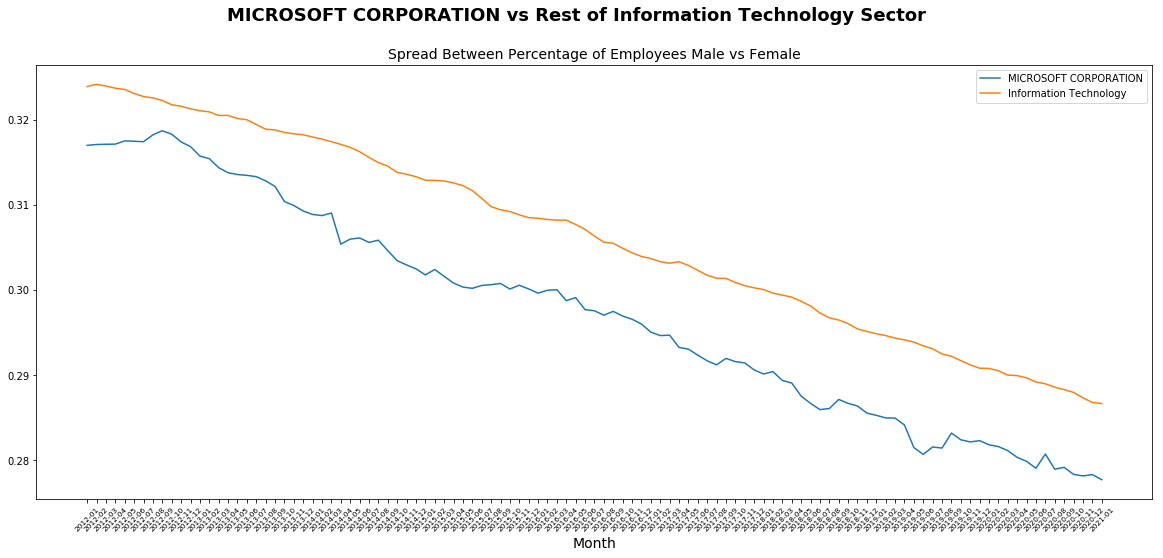

In [23]:
fig,ax = plt.subplots(figsize=(20,8))
x=com_month.loc[com_month['gender']=='male','spread']
z=sector_month.loc[sector_month['gender']=='male','spread']
x.plot.line(ax=ax,label=company)
z.plot.line(ax=ax,label=sector)

plt.suptitle(company+' vs Rest of '+sector+' Sector',size=18,fontweight='bold')
plt.title('Spread Between Percentage of Employees Male vs Female',size=14)
plt.xlabel('Month',size=14)

plt.xticks(com_month.loc[com_month['gender']=='male']
           .index,com_month
           .loc[com_month['gender']=='male','month'],
           size=7.5,rotation=45)

plt.legend()
plt.show()

## Interesting! We see that Microsoft does better than the sector in terms of having a lower spread. And overall, the company and the Information Technology sector are trending in the right direction towards equiality between the genders.

## The next question we wanted to explore is "What is the job makeup of the spread?". We know that the overall trend is that the spread is lowering so another way to ask the question is, "Which jobs have added more males than females?" And again, we started by filtering the data for the company, and then doing the same for the sector.

In [24]:
# Company Hiring Over Time
com_all = df.loc[df['company']==company,:]
com_split = (com_all.groupby(['month','gender','job_category'])[['count']]
             .sum()
             .reset_index())
com_split

com_split['percentage'] = 0

# Percentage change in employee count for each gender from beginning to end of data
com_split['end'] = 0         
for i in range(len(com_split)):
    com_split.loc[i,'percentage'] = (com_split
                                     .loc[i,'count']/com_split
                                     .loc[(com_split['month']==com_split
                                           .loc[i,'month']) & 
                                          (com_split['job_category']==com_split
                                           .loc[i,'job_category']),'count']
                                     .sum())
    com_split.loc[i,'end'] = float(com_split
                                   .loc[(com_split['month']==com_split['month'].max()) & 
                                        (com_split['job_category']==com_split
                                         .loc[i,'job_category']) & 
                                        (com_split['gender']==com_split
                                         .loc[i,'gender']),
                                        'count'])/float(com_split
                                                        .loc[(com_split['month']==com_split['month']
                                                              .min()) & 
                                                             (com_split['job_category']==com_split
                                                              .loc[i,'job_category']) & 
                                                             (com_split['gender']==com_split
                                                              .loc[i,'gender']),'count'])-1

com_split[:10]

,month,gender,job_category,count,percentage,end
0,2012-01,female,administrative,3684.005177,0.531910,0.335354
1,2012-01,female,engineer,32001.730989,0.283336,0.779026
2,2012-01,female,finance,6173.481920,0.558494,0.342900
3,2012-01,female,management,26864.420199,0.338418,0.413847
4,2012-01,female,marketing,7310.310015,0.437954,0.319058
5,2012-01,female,sales,12852.050639,0.347372,0.573551
6,2012-01,female,scientist,3447.204368,0.448394,0.381682
7,2012-01,female,technician,5060.875939,0.367242,0.166247
8,2012-01,male,administrative,3241.990324,0.468090,0.380352
9,2012-01,male,engineer,80944.315629,0.716664,0.574434


In [25]:
end = com_split.loc[com_split['month']==com_split['month'].max(),:]
end['job_category'] = end['job_category'].str.capitalize()
end = end.set_index('job_category')

end

,month,gender,count,percentage,end
job_category,,,,,
Administrative,2021-01,female,4919.452199,0.523650,0.335354
Engineer,2021-01,female,56931.897171,0.308786,0.779026
Finance,2021-01,female,8290.367964,0.568923,0.342900
Management,2021-01,female,37982.177935,0.364055,0.413847
Marketing,2021-01,female,9642.722500,0.452320,0.319058
Sales,2021-01,female,20223.363519,0.387688,0.573551
Scientist,2021-01,female,4762.938735,0.447513,0.381682
Technician,2021-01,female,5902.232550,0.358231,0.166247
Administrative,2021-01,male,4475.086883,0.476350,0.380352


## Now for the sector.

In [26]:
# Sector Hiring Over Time
sector_split = (sector_df3.groupby(['month','gender','job_category'])[['count']]
                .sum()
                .reset_index())
sector_split

sector_split['percentage'] = 0

# Percentage change in employee count for each gender from beginning to end of data
sector_split['end'] = 0         
for i in range(len(sector_split)):
    sector_split.loc[i,'percentage'] = (sector_split.loc[i,'count']/sector_split
                                        .loc[(sector_split['month']==sector_split
                                              .loc[i,'month']) & 
                                             (sector_split['job_category']==sector_split
                                              .loc[i,'job_category']),'count'].sum())
    
    sector_split.loc[i,'end'] = float(
        sector_split.loc[(sector_split['month']==sector_split['month']
                          .max()) & 
                         (sector_split['job_category']==sector_split
                          .loc[i,'job_category']) & 
                         (sector_split['gender']==sector_split
                          .loc[i,'gender']),
                         'count'])/float(sector_split
                                         .loc[(sector_split['month']==sector_split['month']
                                               .min()) & 
                                              (sector_split['job_category']==sector_split
                                               .loc[i,'job_category']) & 
                                              (sector_split['gender']==sector_split
                                               .loc[i,'gender']),'count'])-1

sector_split[:10]

,month,gender,job_category,count,percentage,end
0,2012-01,female,administrative,3.979177e+04,0.531047,0.231818
1,2012-01,female,engineer,7.341031e+05,0.322552,0.376607
2,2012-01,female,finance,7.187587e+04,0.487891,0.155325
3,2012-01,female,management,3.256730e+05,0.336166,0.360205
4,2012-01,female,marketing,3.098397e+04,0.425261,0.333826
5,2012-01,female,sales,1.128452e+05,0.323720,0.208297
6,2012-01,female,scientist,2.208161e+04,0.506068,0.427509
7,2012-01,female,technician,2.725999e+04,0.269746,0.188390
8,2012-01,male,administrative,3.513898e+04,0.468953,0.169995
9,2012-01,male,engineer,1.541818e+06,0.677448,0.269195


In [27]:
sector_end = sector_split.loc[sector_split['month']==sector_split['month'].max(),:]
sector_end['job_category'] = sector_end['job_category'].str.capitalize()
sector_end = sector_end.set_index('job_category')
sector_end

,month,gender,count,percentage,end
job_category,,,,,
Administrative,2021-01,female,4.901621e+04,0.543847,0.231818
Engineer,2021-01,female,1.010572e+06,0.340553,0.376607
Finance,2021-01,female,8.304000e+04,0.475399,0.155325
Management,2021-01,female,4.429822e+05,0.358560,0.360205
Marketing,2021-01,female,4.132721e+04,0.449586,0.333826
Sales,2021-01,female,1.363506e+05,0.350809,0.208297
Scientist,2021-01,female,3.152170e+04,0.530381,0.427509
Technician,2021-01,female,3.239551e+04,0.284061,0.188390
Administrative,2021-01,male,4.111243e+04,0.456153,0.169995


## And now we build the graphs for the company.

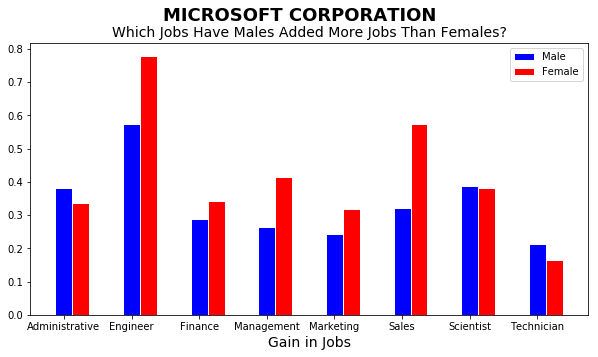

In [28]:
# Company Data

fig,ax = plt.subplots(figsize=(10,5))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = end.loc[end['gender']=='male','end']
bars2 = end.loc[end['gender']=='female','end']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle(company,size=18,fontweight='bold')
plt.title('Which Jobs Have Males Added More Jobs Than Females?',size=14)
plt.xlabel('Gain in Jobs',size=14)
plt.xticks(end.loc[end['gender']=='male',:].reset_index().index,
           end.loc[end['gender']=='male'].index,
           size=10)
plt.ylabel('')

# Create legend & Show graphic
plt.legend()
plt.show()

## Interesting! We see that Females were hired more in every job, with the exception of administrative and scientist.

## What does the sector look like? Lets's build the graph and take a look!

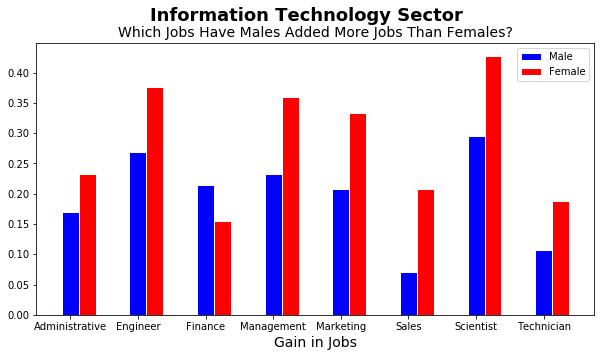

In [29]:
# Rest of Sector Data

fig,ax = plt.subplots(figsize=(10,5))

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = sector_end.loc[sector_end['gender']=='male','end']
bars2 = sector_end.loc[sector_end['gender']=='female','end']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='Female')

plt.suptitle(sector+' Sector',size=18,fontweight='bold')
plt.title('Which Jobs Have Males Added More Jobs Than Females?',size=14)
plt.xlabel('Gain in Jobs',size=14)
plt.xticks(sector_end.loc[sector_end['gender']=='male',:].reset_index().index,
           sector_end.loc[sector_end['gender']=='male'].index,
           size=10)
plt.ylabel('')

# Create legend & Show graphic
plt.legend()
plt.show()

## We see that Finance is where Males have added more jobs than Females.

## Next, we looked at inflow of female changes over time, for Information Technology companies in North America with job category as Engineer, assuming inflow represents a firm acquiring new talents. To do this, we had to make changes to the dataset.

In [30]:
# remove empty
df = df.loc[df['region'] != 'empty']

In [31]:
# Extracting year
df['year'] = pd.DatetimeIndex(df['month']).year  

# Extracting month
df['month_in_year'] = pd.DatetimeIndex(df['month']).month 

In [32]:
# Set Values
sector = 'Information Technology'
region = 'Northern America'
job = 'engineer'

In [33]:
# Females
females = df.loc[(df['sector'] == sector) & 
                 (df['region'] == region) &
                 (df['gender'] == 'female') &
                 (df['job_category'] == job),
                 ['company','month', 'count', 'inflow', 
                  'outflow', 'year', 'month_in_year']]

# Males
males = df.loc[(df['sector'] == sector) & 
                 (df['region'] == region) &
                 (df['gender'] == 'male') &
                 (df['job_category'] == job),
                 ['company','month', 'count', 'inflow', 
                  'outflow', 'year', 'month_in_year']]

In [34]:
# Females flow
female_flow = (females.groupby(['company','year'], as_index=False)
                 .agg({'inflow':'mean', 'outflow':'mean'})
                 .sort_values(['company','year']))

# Males flow
male_flow = (males.groupby(['company','year'], as_index=False)
                 .agg({'inflow':'mean','outflow':'mean'})
                 .sort_values(['company','year']))

In [35]:
# Companies List
female_company = female_flow['company'].unique()

In [36]:
# maximum and minimum inflow values
max_inflow = female_flow['inflow'].max()
min_inflow = female_flow['inflow'].min()

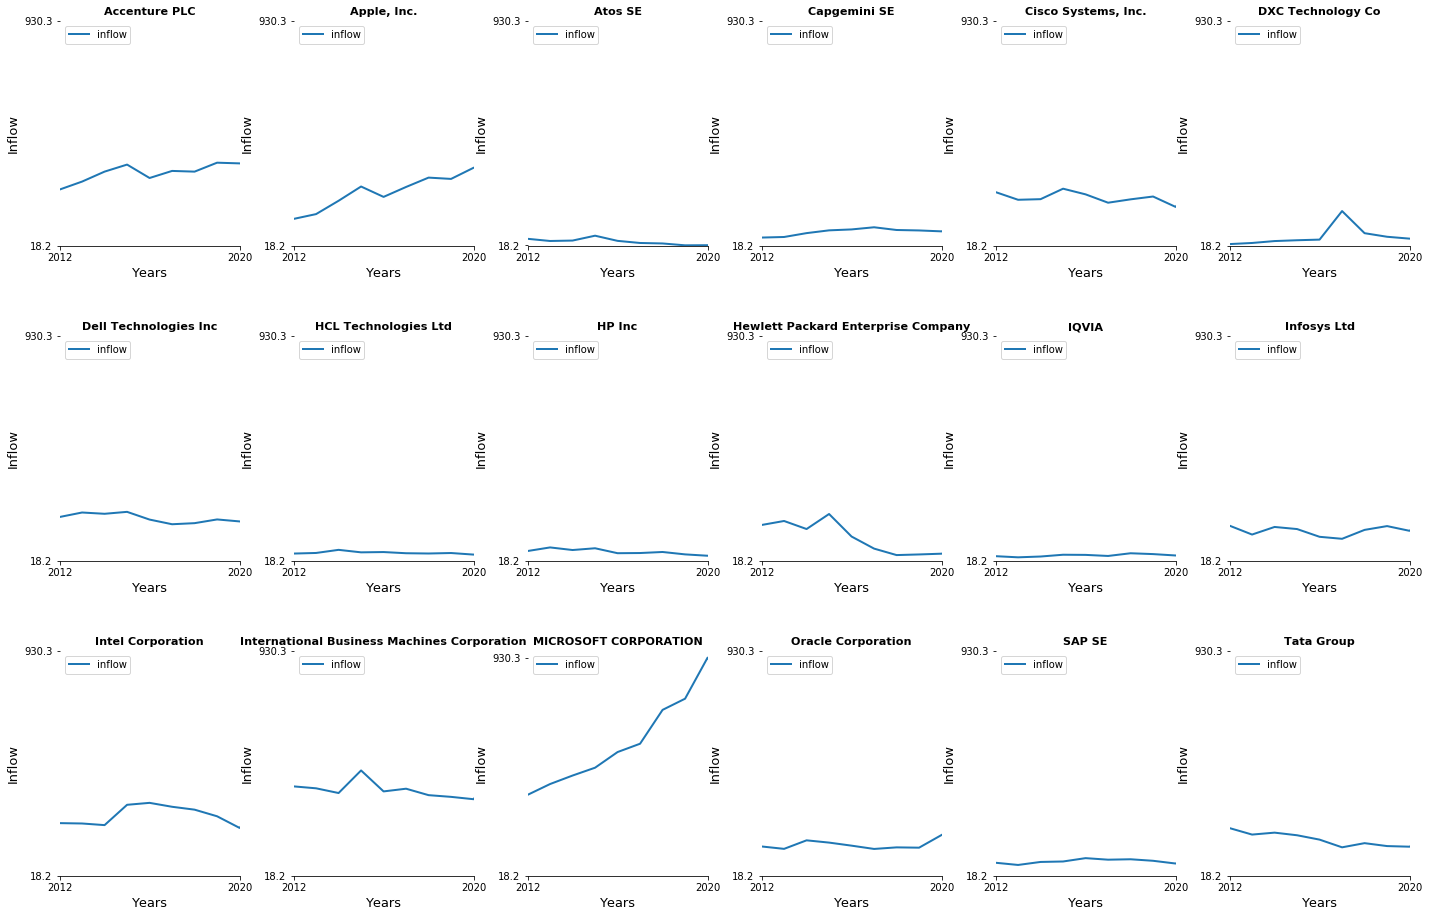

In [37]:
# How inflow for females changes over time for different companies in Information  
# Technology Sector in North American in Engineering job category?

# Graph: For this we used Sparkline Charts which is typically drawn without axes 
# or coordinates

fig, ax = plt.subplots(nrows = 3, ncols= 6, figsize=(10,5))
fig.subplots_adjust(right=2, top=2.5, wspace = 0.3, hspace = 0.4)

c = 0 
for i in range(0, 3):
    for j in range(0,6):
        df_female_inflow = female_flow.loc[female_flow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_female_inflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        ax[i][j].set_title(female_company[c], size=11.2, fontweight="bold")
        
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        
        # Only considering data till 2020 because for year 2021, only 1 month 
        # data is available
        ax[i][j].set_xlim(2012, 2020)
        
        # To remove the unnecessary information because our aim here is to
        # observe the trend of females between different companies, not 
        # to find the precise value at a particular time.
        ax[i][j].set_xticks([2012,2020])
        
        # Same range for y axis for easy comparison between companies
        ax[i][j].set_yticks([min_inflow, max_inflow])
        ax[i][j].legend(loc="upper left")
        ax[i][j].set_xlabel('Years', size=13)
        ax[i][j].set_ylabel('Inflow', size=13)
        c+=1

## Interesting, we see here Mircosoft has a high uptrend.

## Now we do the same for outflow, assuming that means a firms ability to retain talent.

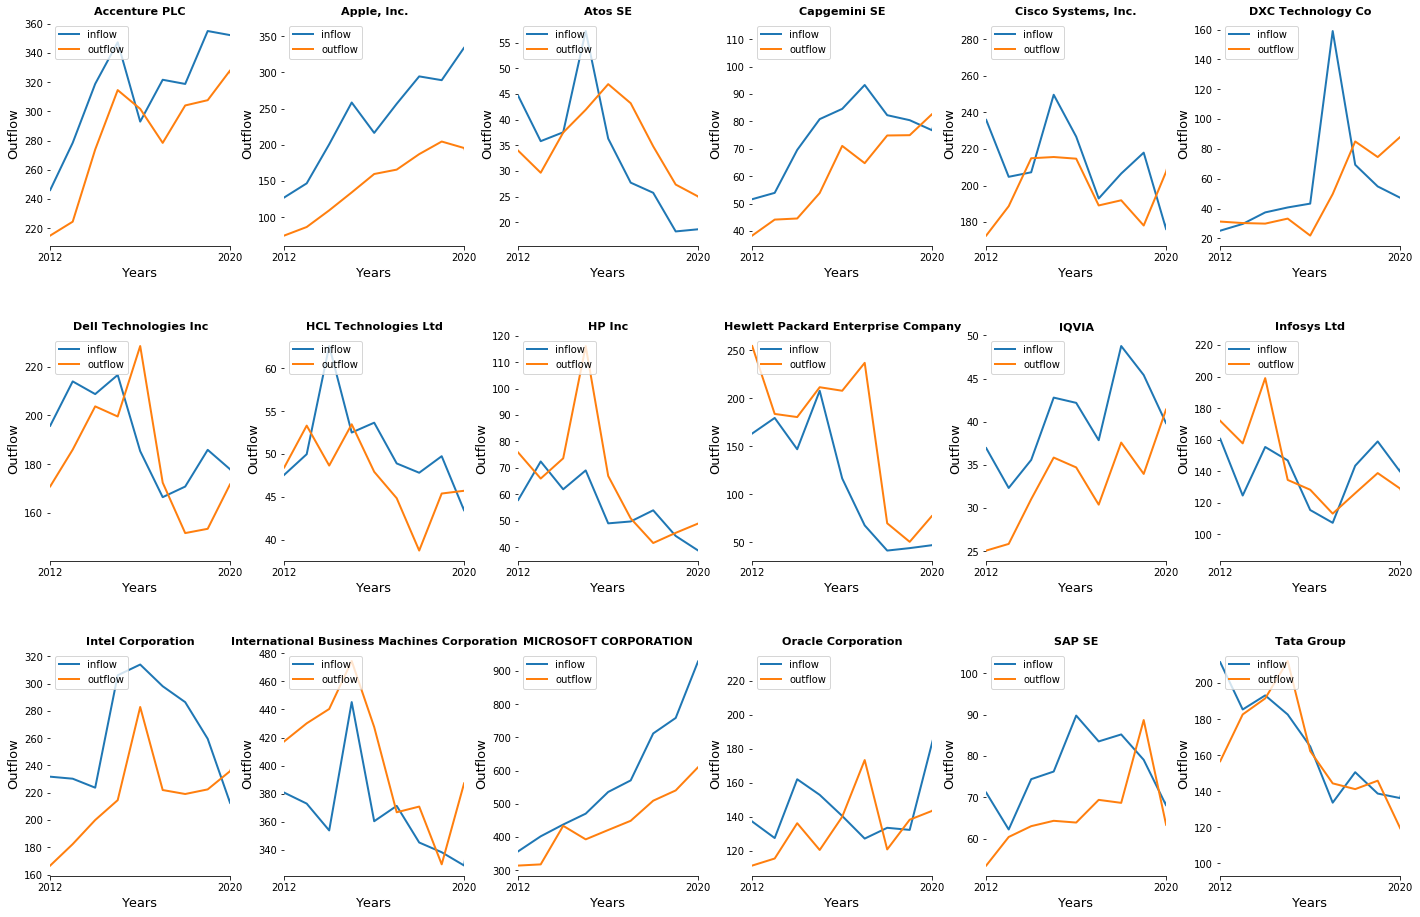

In [38]:
# How Inflow and Outflow of Female changes over time for Northern America region 
# in Information Technology Sector in Engineer Job Category?

fig, ax = plt.subplots(nrows = 3, ncols= 6, figsize=(10,5))
fig.subplots_adjust(right=2, top=2.5, wspace = 0.3, hspace = 0.4)

c = 0 
for i in range(0, 3):
    for j in range(0,6):
        # Inflow
        df_female_inflow = female_flow.loc[female_flow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_female_inflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        # Outflow
        df_female_outflow = female_flow.loc[female_flow['company'] == female_company[c], 
                                      ['year', 'outflow']].sort_values('year')
        
        df_female_outflow.plot(ax=ax[i][j], x = 'year', y = 'outflow', linewidth=2)
        
        ax[i][j].set_title(female_company[c], size=11.2, fontweight="bold")
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        
        # Only considering data till 2020 because for year 2021, only 1 month 
        # data is available
        ax[i][j].set_xlim(2012, 2020)
        
        # To remove the unnecessary information because our aim here is to
        # observe the trend of females between different companies, not 
        # to find the precise value at a particular time.
        ax[i][j].set_xticks([2012,2020])
        ax[i][j].legend(loc="upper left")
        ax[i][j].set_xlabel('Years', size=13)
        ax[i][j].set_ylabel('Outflow', size=13)
        c+=1

## Spikes in the inflow might represent a company expanding or developing R&D while a spike in outflow might mean a company struggling to retain its talent, restructuring or showing itself to be more competitive to shareholders

## The last thing we wanted to plot was the Male vs Female outflows and inflows. First we started with inflow.

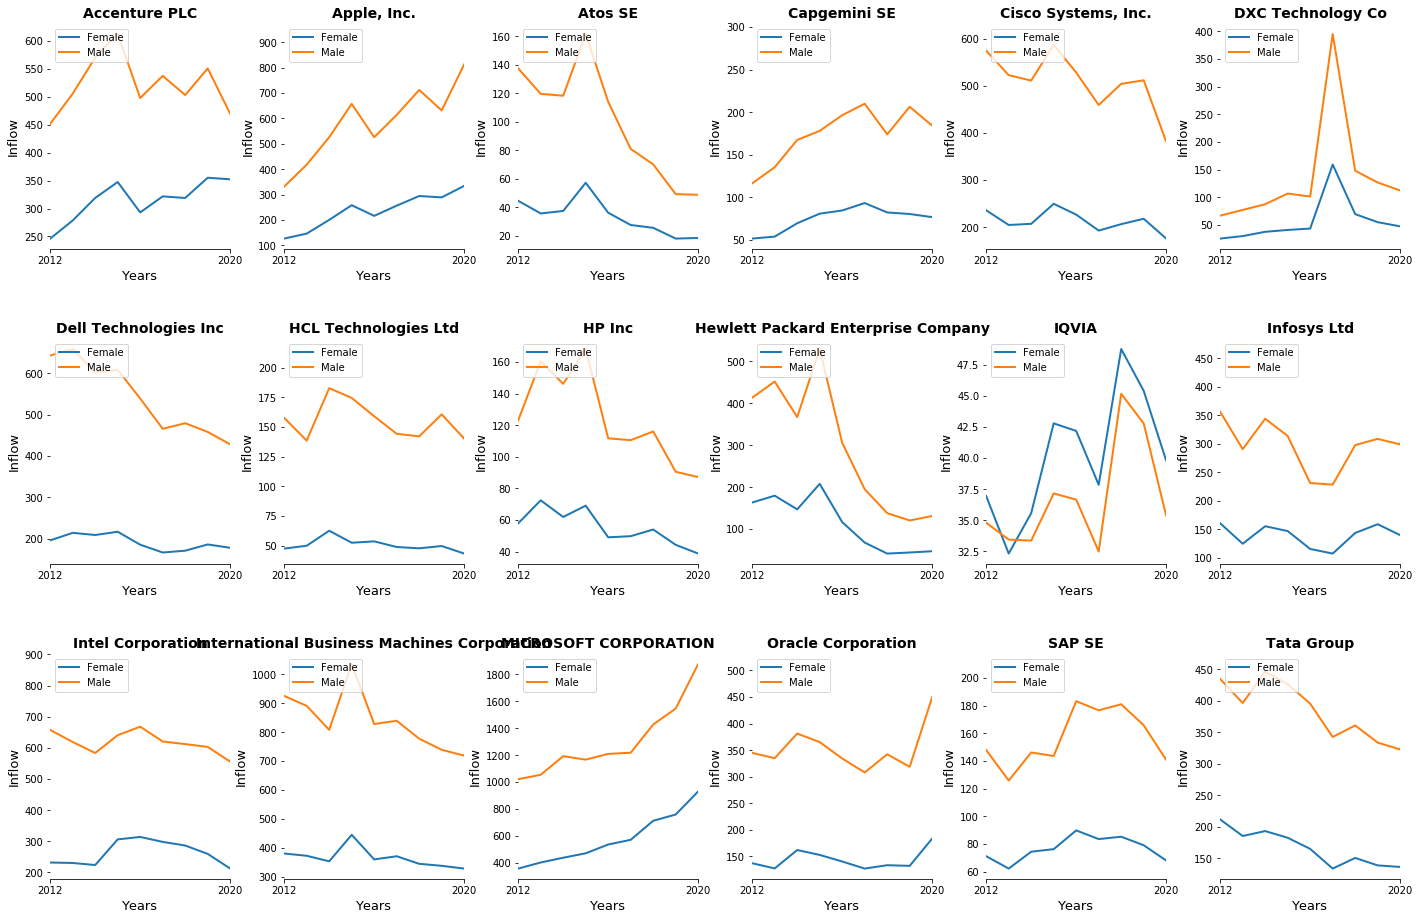

In [39]:
# How Inflow of Male and Female changes over time for Northern America region 
# in Information Technology Sector in Engineer Job Category?

fig, ax = plt.subplots(nrows = 3, ncols= 6, figsize=(10,5))
fig.subplots_adjust(right=2, top=2.5, wspace = 0.3, hspace = 0.4)

c = 0 
for i in range(0, 3):
    for j in range(0,6):
        
        # Female Inflow
        df_female_inflow = female_flow.loc[female_flow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_female_inflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        # Male Inflow
        df_male_inflow = male_flow.loc[male_flow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_male_inflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        
        ax[i][j].set_title(female_company[c], size=14, fontweight="bold")
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].set_xlim(2012, 2020)
        
        # To remove the unnecessary information because our aim here is to
        # observe the trend of females between different companies, not 
        # to find the precise value at a particular time.
        ax[i][j].set_xticks([2012,2020])
        
        ax[i][j].legend(['Female', 'Male'], loc="upper left")
        ax[i][j].set_xlabel('Years', size=13)
        ax[i][j].set_ylabel('Inflow', size=13)
        c+=1

## Then we did the same for outflow.

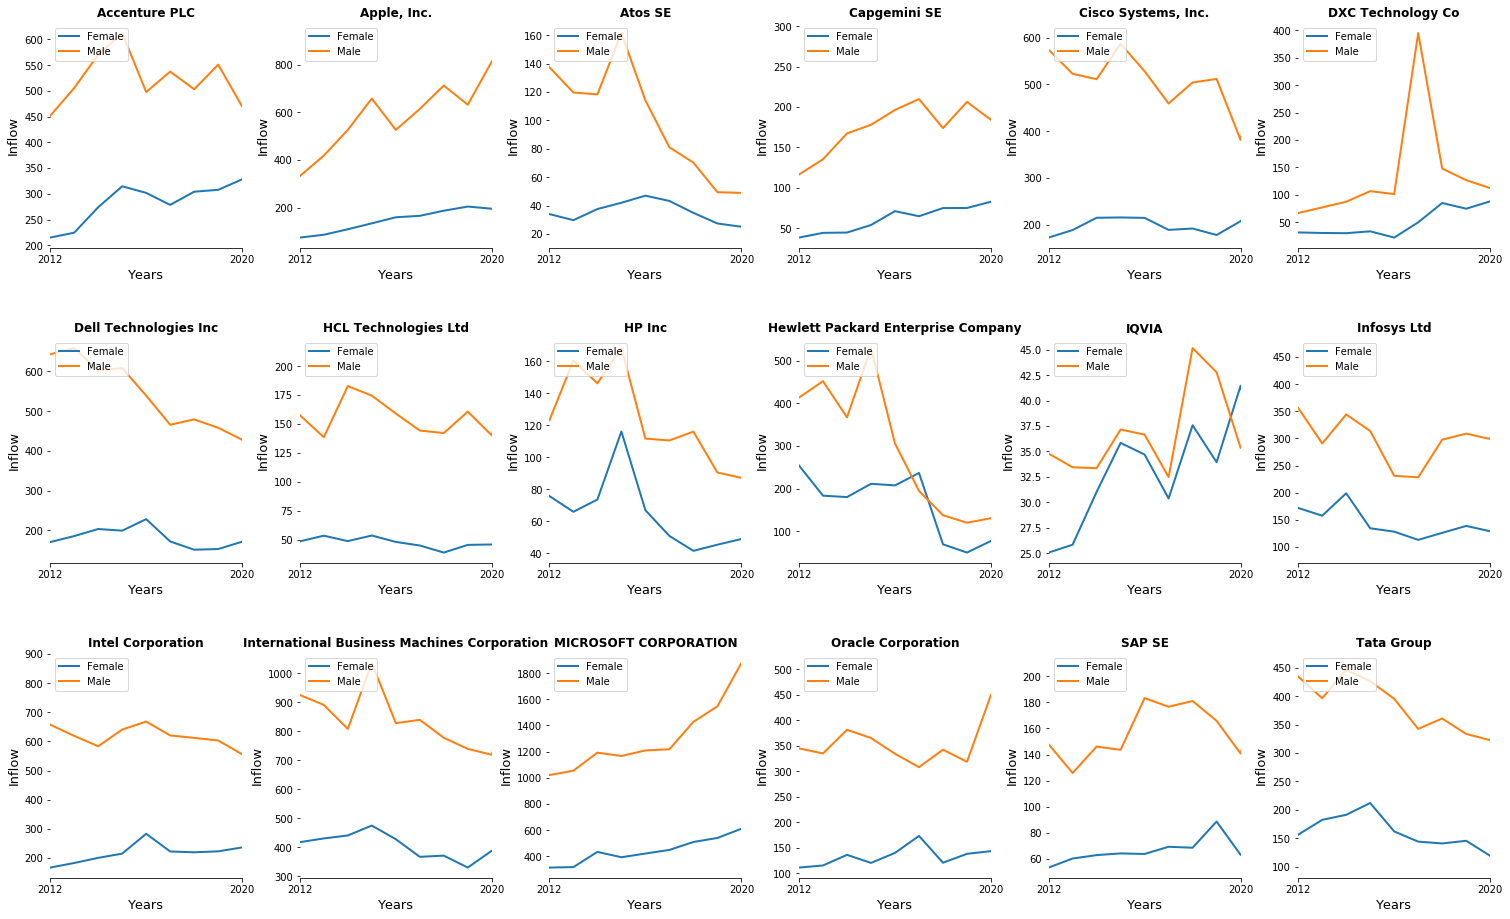

In [40]:
# How Outflow of Male and Female changes over time for Northern America region 
# in Information Technology Sector in Engineer Job Category?

fig, ax = plt.subplots(nrows = 3, ncols= 6, figsize=(10,5))
fig.subplots_adjust(left = 0, right=2, top=2.5, wspace = 0.3, hspace = 0.4)

c = 0 
for i in range(0, 3):
    for j in range(0,6):

        # Female Outflow
        df_female_outflow = female_flow.loc[female_flow['company'] == female_company[c], 
                                      ['year', 'outflow']].sort_values('year')
        
        df_female_outflow.plot(ax=ax[i][j], x = 'year', y = 'outflow', linewidth=2)
        
        # Male Outflow
        df_male_outflow = male_flow.loc[male_flow['company'] == female_company[c], 
                                      ['year', 'inflow']].sort_values('year')
        
        df_male_outflow.plot(ax=ax[i][j], x = 'year', y = 'inflow', linewidth=2)
        
        
        ax[i][j].set_title(female_company[c], size=12, fontweight="bold")
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].set_xlim(2012, 2020)
        
        # To remove the unnecessary information because our aim here is to
        # observe the trend of females between different companies, not 
        # to find the precise value at a particular time.
        ax[i][j].set_xticks([2012,2020])
        ax[i][j].legend(['Female', 'Male'], loc="upper left")
        ax[i][j].set_xlabel('Years', size=13)
        ax[i][j].set_ylabel('Inflow', size=13)
        c+=1

## We can see that females are less likely to leave the firm as compared to males - However, IQVIA is interesting as Females are leaving more.


## And that's our project! Hope you had as much fun as we did exploring the data!